> Project Name : House Prices: Advanced Regression

> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

> Data Pre-processing steps :

1. Importing The Libraries

2. Importing The Dataset

3. Missing Data

4. Encoding categorical data

5. Feature Scaling

6. Splitting the dataset into the Training set and Test set

> Data Visualization

> The Algorithms used in the Project : -

1. Linear Regression [ Ridge ]
2. Decision Tree
3. Random Force

> Evaluation Regression Methods Performance : - [ Metrics Model ]

1. Mean Absolute Error
2. Mean Squared Error
3. Cross Validation


> Compare all the algorithm 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
print('Train Data: \n\n',train.head(10))
print('*******************************************************')
print('Train Data Shape: ',train.shape)
print('*******************************************************')
print(train.columns)
print('*******************************************************')

Train Data: 

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    All

In [3]:
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
print('Test Data: \n\n',test.head(10))
print('*******************************************************')
print('Test Data Shape: ',test.shape)
print('*******************************************************')
print(test.columns)
print('*******************************************************')

Test Data: 

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv       

In [4]:
train['train']  = 1
test['train']  = 0
all_dataset = pd.concat([train, test], axis=0,sort=False)

In [5]:
print(all_dataset.head(5))
print(all_dataset.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  train  
0       WD         Normal   208500

In [6]:
all_dataset =  all_dataset.drop(['Id'], axis=1)
print('All Dataset Shape:',all_dataset.shape)

All Dataset Shape: (2919, 81)


> Selecting high correlated features to make visualization

Text(0, 0.5, 'SalePrice')

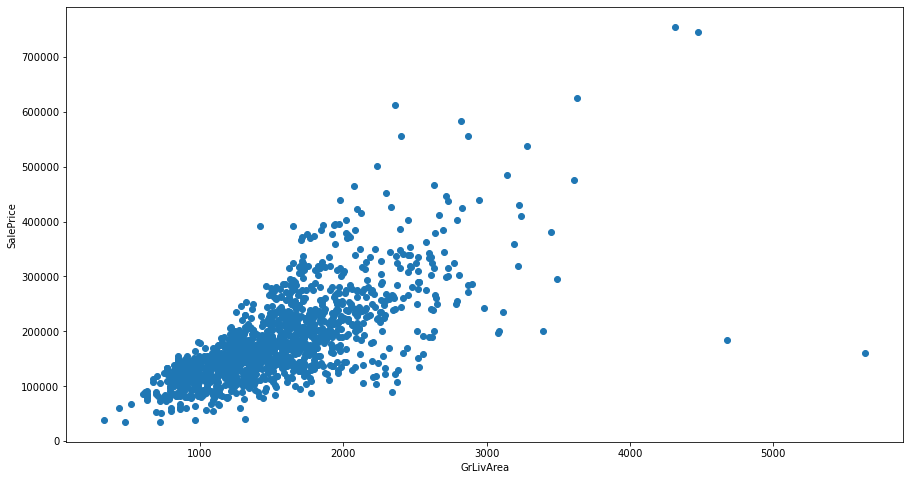

In [7]:
plt.figure(figsize=(15,8))
plt.scatter(all_dataset['GrLivArea'],all_dataset['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

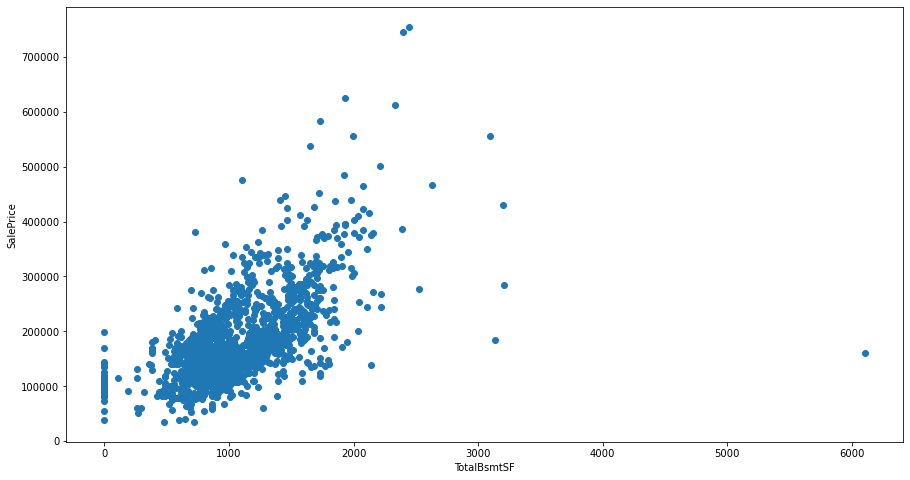

In [8]:
plt.figure(figsize=(15,8))
plt.scatter(all_dataset['TotalBsmtSF'],all_dataset['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

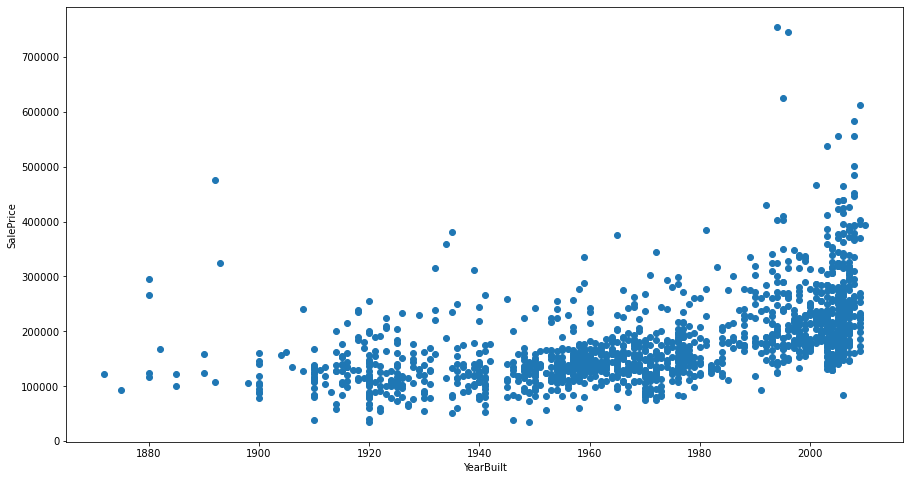

In [9]:
plt.figure(figsize=(15,8))
plt.scatter(all_dataset['YearBuilt'],all_dataset['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')


> Visualization is more accurate

> Missing Dataset

In [10]:
#missing data
total = all_dataset.isnull().sum().sort_values(ascending=False)
percent = (all_dataset.isnull().sum()/all_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


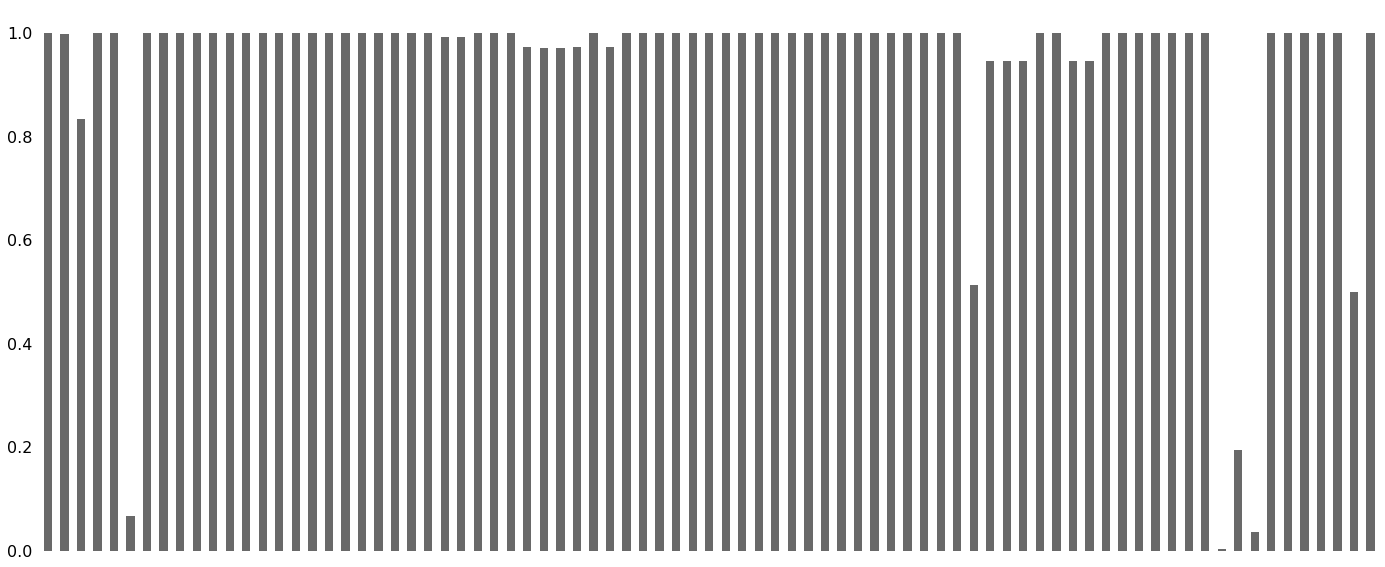

In [11]:
import missingno as msno
msno.bar(all_dataset)

> If the data set is missing in the feature, more than 15 % , we delete it

In [12]:
all_dataset = all_dataset.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [13]:
print(all_dataset)
print('All Dataset Shape \n',all_dataset.shape)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1454         160       RM         21.0     1936   Pave      Reg         Lvl   
1455         160       RM         21.0     1894   Pave      Reg         Lvl   
1456          20       RL        160.0    20000   Pave      Reg         Lvl   
1457          85       RL         62.0    10441   Pave      Reg         Lvl   
1458          60       RL         74.0     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch S

In [14]:
all_dataset.dtypes.value_counts()

object     38
int64      26
float64    12
dtype: int64

In [15]:
all_dataset = pd.get_dummies(all_dataset)

In [16]:
all_dataset.shape

(2919, 272)

In [17]:
train = all_dataset[all_dataset['train'] == 1]
train = train.drop(['train',],axis=1)

test = all_dataset[all_dataset['train'] == 0]
test = test.drop(['SalePrice'],axis=1)
test = test.drop(['train',],axis=1)

In [18]:
print(train.shape)
print(test.shape)

(1460, 271)
(1459, 270)


In [19]:
target=train['SalePrice']
train.drop(['SalePrice'],axis=1,inplace=True)

In [20]:
print(train.shape)
print(test.shape)

(1460, 270)
(1459, 270)


In [21]:
X=train.iloc[:,:]
y=target
test=test.iloc[:,:]
print('X: ',X)
print('X Shape: ',X.shape)
print('Y: ',y)
print('Y_ Shape: ',y.shape)
print('X_test: ',test)
print('X_test: ',test.shape)

X:        MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  Bsm

In [22]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imputer.fit_transform(X)
test=imputer.fit_transform(test)
print(X[:10,:])
print('***********************************')
print(test[:10,:])

[[6.0000e+01 6.5000e+01 8.4500e+03 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.0000e+01 8.0000e+01 9.6000e+03 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [6.0000e+01 6.8000e+01 1.1250e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [6.0000e+01 6.0000e+01 1.0382e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [5.0000e+01 5.1000e+01 6.1200e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.9000e+02 5.0000e+01 7.4200e+03 ... 0.0000e+00 1.0000e+00 0.0000e+00]]
***********************************
[[2.0000e+01 8.0000e+01 1.1622e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.0000e+01 8.1000e+01 1.4267e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [6.0000e+01 7.4000e+01 1.3830e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [6.0000e+01 6.3000e+01 8.4020e+03 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.0000e+01 8.5000e+01 1.0176e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.0000e+01 7.0000e+01 8.4000e+03 ... 0.0000e+00 1.0000e+00 0.0000e+00]]


In [23]:
X = pd.DataFrame(X)
test = pd.DataFrame(test)

In [24]:
import statsmodels.api as sm
model_OLS = sm.OLS(y, X).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     70.29
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:48:45   Log-Likelihood:                -16592.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1224   BIC:                         3.490e+04
Df Model:                         235                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            -31.4460     82.785     -0.380      0.704    -193.862     130.970
1             45.0255     42.061      1.070      0.285     -37.495     127.546
2              0.7514      0.109      6.897      0.000       0.538       0.965
3           6561.2991   1011.301      6.488      0.000    4577.224    8545.374
4           5733.6057    872.037      6.575      0.000    4022.753    7444.458
5            321.3463     76.824      4.183      0.000     170.626     472.067
6             96.0800     55.350      1.736      0.083     -12.512     204.672
7             18.7665      5.778      3.248      0.001       7.431      30.102
8             16.9701      2.880      5.893      0.000      11.320      22.620
9              7.0952      5.983      1.186      0.236      -4.644      18.834
10            -1.8878      2.765     -0.683      0.495      -7.312       3.536
11            22.1775      4.043      5.485      0.000      14.245      30.110
12            16.1365      6.255      2.580      0.010       3.865      28.408
13            35.6285      5.414      6.581      0.000      25.008      46.249
14           -21.0145     13.542     -1.552      0.121     -47.582       5.553
15            30.7505      5.490      5.601      0.000      19.980      41.521
16           821.9792   1978.004      0.416      0.678   -3058.675    4702.634
17          -537.4666   3021.941     -0.178      0.859   -6466.225    5391.292
18          3624.8927   2203.780      1.645      0.100    -698.712    7948.497
19          1163.1795   2095.322      0.555      0.579   -2947.641    5274.000
20         -3367.2755   1360.423     -2.475      0.013   -6036.295    -698.256
21          -1.28e+04   5674.637     -2.256      0.024   -2.39e+04   -1666.829
22          1058.6836    943.786      1.122      0.262    -792.934    2910.301
23          2545.1649   1336.991      1.904      0.057     -77.884    5168.214
24           -19.4603     61.101     -0.318      0.750    -139.335     100.414
25          4064.0032   2279.339      1.783      0.075    -407.841    8535.847
26            17.8070      7.890      2.257      0.024       2.328      33.286
27            13.6946      5.843      2.344      0.019       2.231      25.158
28             3.4953     11.470      0.305      0.761     -19.008      25.999
29             3.9468     12.393      0.318      0.750     -20.367      28.261
30            31.0422     22.441      1.383      0.167     -12.984      75.068
31            28.7196     12.293      2.336      0.020       4.601      52.838
32            83.6626     18.319      4.567      0.000      47.722     119.603
33             0.1100      1.418      0.078      0.938      -2.672       2.892
34          -433.3930    245.036     -1.769      0.077    -914.131      47.345
35          -422.4230    516.071     -0.819      0.413   -1434.905     590.059
36

In [25]:
p_value = pd.DataFrame(model_OLS.pvalues, columns = ['pvalues'])
p_value = p_value.style.format({'pvalues': '{:.7f}'})
p_value

,pvalues
0,0.7041205
1,0.2846163
2,0.0000000
3,0.0000000
4,0.0000000
5,0.0000308
6,0.0828408
7,0.0011936
8,0.0000000
9,0.2359266


In [26]:
del_col = abs(model_OLS.pvalues)
#Selecting Zero correlated features
features = del_col[model_OLS.pvalues > 0.05]
features

0      0.704121
1      0.284616
6      0.082841
9      0.235927
10     0.494867
         ...   
265    0.930920
266    0.968481
267    0.848099
268    0.987755
269    0.832125
Length: 231, dtype: float64

In [27]:
X = X.drop(features.index,axis=1)

In [28]:
test = test.drop(features.index,axis=1)

In [29]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def train(model, X, y):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

    Cross_Validation1 = cross_validate(model, X, y, cv=5, return_train_score=True)
    CrossValidateValues2 = cross_validate(model,X,y,cv=5,scoring=('r2','neg_mean_squared_error'),return_train_score = True)

    print('Train Score Value : ', Cross_Validation1['train_score'])
    print('Test Score Value : ', Cross_Validation1['test_score'])
    print('*********************************************************************************************')
    print('Train MSE Value : ', CrossValidateValues2['train_neg_mean_squared_error'])
    print('Test MSE Value : ', CrossValidateValues2['test_neg_mean_squared_error'])
    print('*********************************************************************************************')
    print('Train R2 Value : ', CrossValidateValues2['train_r2'])
    print('Test R2 Value : ', CrossValidateValues2['test_r2'])
    print('*********************************************************************************************')

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

    cv_score = np.abs(np.mean(cv_score))
    print("CV Mean Square Errors [MSE] :", cv_score)
    print("CV Root Mean Square Errors [RMSE] :", np.sqrt(cv_score))
    print("CV R2 :", np.mean(cv_score_r2))
    print('*********************************************************************************************')

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred) 
    print('Mean Absolute Error Value in Model is : ',MAE)

    MSE = mean_squared_error(y_test, y_pred) 
    print('Mean Squared Error Value in Model is : ', MSE)
    
    RMSE =  np.sqrt(MSE)
    print('Root Mean Squared Error Value in Model is : ',RMSE)

    r2 = r2_score(y_test,y_pred)
    print('R2 Value in Model is : ',r2)

In [30]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=1)
train(lr, X, y)

Train Score Value :  [0.85501827 0.85857935 0.86142955 0.86216405 0.87397362]
Test Score Value :  [0.87320071 0.83268723 0.84513678 0.84260569 0.66572042]
*********************************************************************************************
Train MSE Value :  [-9.42398663e+08 -8.82394060e+08 -8.29324864e+08 -9.09409280e+08
 -7.82194797e+08]
Test MSE Value :  [-7.01533544e+08 -1.09935697e+09 -1.17352218e+09 -7.97336751e+08
 -2.24146810e+09]
*********************************************************************************************
Train R2 Value :  [0.85501827 0.85857935 0.86142955 0.86216405 0.87397362]
Test R2 Value :  [0.87320071 0.83268723 0.84513678 0.84260569 0.66572042]
*********************************************************************************************
CV Mean Square Errors [MSE] : 1202643509.416637
CV Root Mean Square Errors [RMSE] : 34679.15093275262
CV R2 : 0.8118701654720292
**********************************************************************************

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10)
train(dt, X, y)

Train Score Value :  [0.98182468 0.98417307 0.98201256 0.98272424 0.98685855]
Test Score Value :  [0.7238253  0.75096666 0.83100279 0.61440093 0.68439754]
*********************************************************************************************
Train MSE Value :  [-1.18141778e+08 -9.87521188e+07 -1.07652336e+08 -1.13981426e+08
 -8.15636736e+07]
Test MSE Value :  [-1.39683644e+09 -1.68981451e+09 -1.25017942e+09 -1.23678990e+09
 -1.56817676e+09]
*********************************************************************************************
Train R2 Value :  [0.98182468 0.98417307 0.98201256 0.98272424 0.98685855]
Test R2 Value :  [0.74752758 0.74282462 0.83502075 0.75585762 0.76613119]
*********************************************************************************************
CV Mean Square Errors [MSE] : 1524670796.1149998
CV Root Mean Square Errors [RMSE] : 39047.03312820322
CV R2 : 0.7661171496881278
*********************************************************************************

In [32]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(max_depth=40,n_estimators=100,min_samples_split=10)
train(rf, X, y)

Train Score Value :  [0.95974051 0.95394207 0.95709713 0.96079565 0.95620056]
Test Score Value :  [0.85725917 0.85223856 0.86476643 0.85324075 0.82364065]
*********************************************************************************************
Train MSE Value :  [-2.66720746e+08 -2.66182638e+08 -2.64830210e+08 -2.86846248e+08
 -2.59850006e+08]
Test MSE Value :  [-8.00670620e+08 -9.92657496e+08 -9.96430679e+08 -6.71530467e+08
 -1.09392259e+09]
*********************************************************************************************
Train R2 Value :  [0.9589668  0.9573391  0.95574998 0.95652373 0.95813325]
Test R2 Value :  [0.85528209 0.84892598 0.86850657 0.86743985 0.83685872]
*********************************************************************************************
CV Mean Square Errors [MSE] : 914623382.1183977
CV Root Mean Square Errors [RMSE] : 30242.740982232375
CV R2 : 0.8564100766409151
*********************************************************************************

In [33]:
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [34]:
pred = rf.predict(test)
print(pred)

[132099.43202994 162163.34697468 180450.4067737  ... 162346.79418249
 120114.60961725 229575.02345021]


In [35]:
submission.loc[:, 'SalePrice'] = pred
submission

,Id,SalePrice
0,1461,132099.432030
1,1462,162163.346975
2,1463,180450.406774
3,1464,185275.836196
4,1465,207990.363913
...,...,...
1454,2915,84147.869705
1455,2916,89662.098135
1456,2917,162346.794182
1457,2918,120114.609617


In [36]:
submission.to_csv('submission.csv', index=False)